<a href="https://colab.research.google.com/github/TaniaHafsa/DIP_lab_final_task/blob/main/DIP_lab_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Task-1

Upload the image(DIP_Lab_task_01.png) from drive with extracting details like: image dimension, frequency distribution of intensities, range.

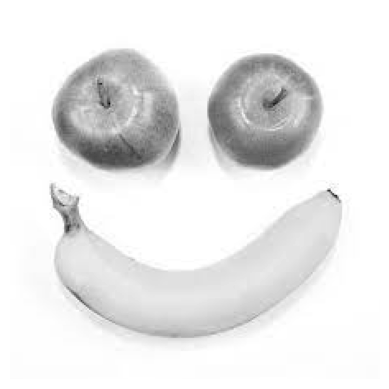

Image Dimensions: 225x225
Intensity Range: 5-255


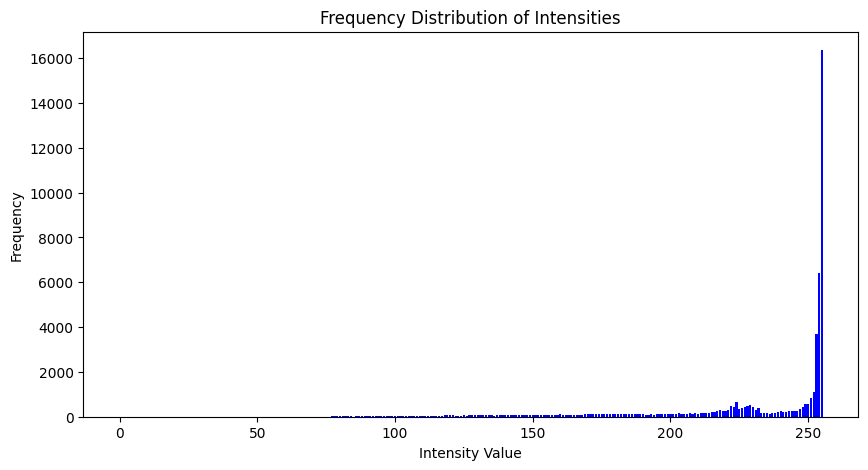

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io


lab_task1 = '/content/drive/MyDrive/DIP_Lab_task_01.png'
image = cv2.imread(lab_task1, cv2.IMREAD_GRAYSCALE)

# Display image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# dimensions
height, width = image.shape
print(f"Image Dimensions: {width}x{height}")

# frequency distribution
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
hist = hist.flatten()

# range
min_intensity = image.min()
max_intensity = image.max()
print(f"Intensity Range: {min_intensity}-{max_intensity}")

# histogram
plt.figure(figsize=(10, 5))
plt.title("Frequency Distribution of Intensities")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.bar(range(256), hist, color='blue')
plt.show()

Task-2

Convert the RGB image(DIP_Lab_task_02.jpg) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison).


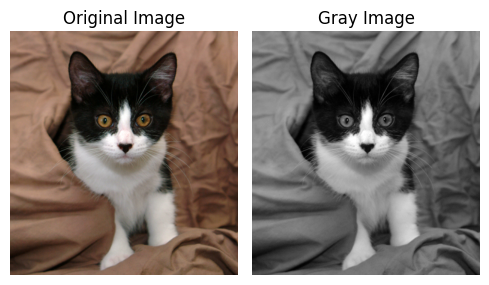

Sub-region (5x5) intensity values:
[[106 106 107 108 106]
 [113 114 112 114 111]
 [117 118 118 117 115]
 [119 120 120 120 117]
 [122 122 119 119 118]]


In [7]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt


lab_task2 = io.imread('/content/drive/MyDrive/DIP_Lab_task_02.jpg')[:, :, :3]

# RGB to grayscale
def rgbtogray(image):
    ret = (image[:, :, 0] * 0.2989 +
           image[:, :, 1] * 0.5870 +
           image[:, :, 2] * 0.1140).astype(np.uint8)
    return ret


grayImg = rgbtogray(lab_task2)

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(5, 5))

ax[0].imshow(lab_task2)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(grayImg, cmap='gray')
ax[1].set_title('Gray Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Defining a 5x5 sub-region for comparison
x, y = 50, 50
sub_region = grayImg[y:y+5, x:x+5]

print(f"Sub-region (5x5) intensity values:\n{sub_region}")


Task-3

Apply Image(DIP_Lab_task_03.png) smoothing with appropriate kernel applied. Identify the noise(if any) before processing.

Number of salt-and-pepper noise pixels: 17624


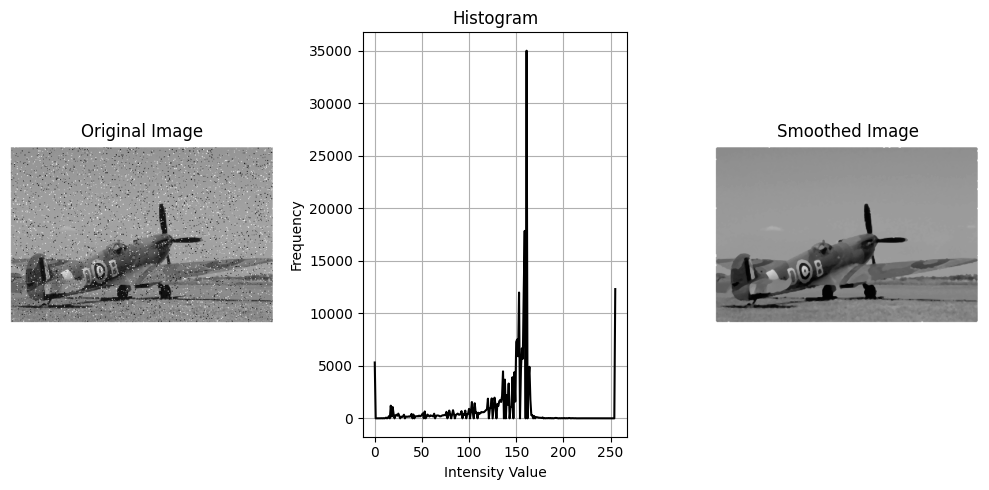

In [12]:
import cv2
import matplotlib.pyplot as plt

lab_task3_img = '/content/drive/MyDrive/DIP_Lab_task_03.png'
image = cv2.imread(lab_task3_img, cv2.IMREAD_GRAYSCALE)

# original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Analyze the noise (plot histogram)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.subplot(1, 3, 2)
plt.title("Histogram")
plt.plot(hist, color='black')
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.grid()

# Checking the noise (salt-and-pepper)
salt_pepper_noise = np.sum((image == 255) | (image == 0))
print(f"Number of salt-and-pepper noise pixels: {salt_pepper_noise}")

# Median Filter for smoothing
smoothed_image = cv2.medianBlur(image, 5)

# smoothed image
plt.subplot( 1,3, 3)
plt.title("Smoothed Image")
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



Task-4

Implement an appropriate technique to reduce the brightness of the provided image (DIP_Lab_task_04.jpg) effectively.

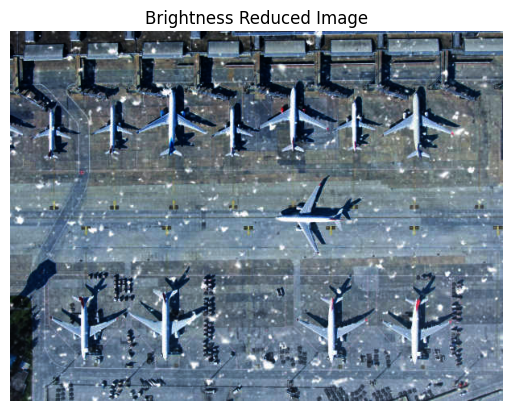

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/DIP_Lab_task_04.jpg')

image_float = np.float32(image) / 255.0
gamma = 2.6
corrected_image = np.power(image_float, gamma) * 255

corrected_image = np.uint8(np.clip(corrected_image, 0, 255))

# Displaying the Brightness Reduced image
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.title("Brightness Reduced Image")
plt.axis('off')
plt.show()

Task-5

Solve the segmentation problem for the given image: 'DIP_Lab_task_05.jpg'

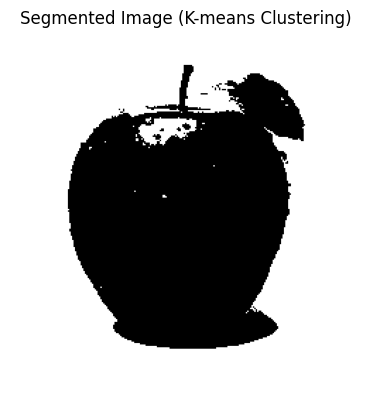

In [ ]:
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = io.imread('/content/drive/MyDrive/DIP_Lab_task_05.jpg')

gray_image = color.rgb2gray(image)
gray_image = (gray_image * 255).astype(np.uint8)

# Flatten the image into a 1D array for clustering
pixel_values = gray_image.flatten().reshape(-1, 1)

# Applying K-means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pixel_values)
segmented = kmeans.labels_.reshape(gray_image.shape)

segmented_image = (segmented * 255 / (num_clusters - 1)).astype(np.uint8)

plt.figure(figsize=(10, 5))

# K-means segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')
plt.title("Segmented Image (K-means Clustering)")

plt.show()
